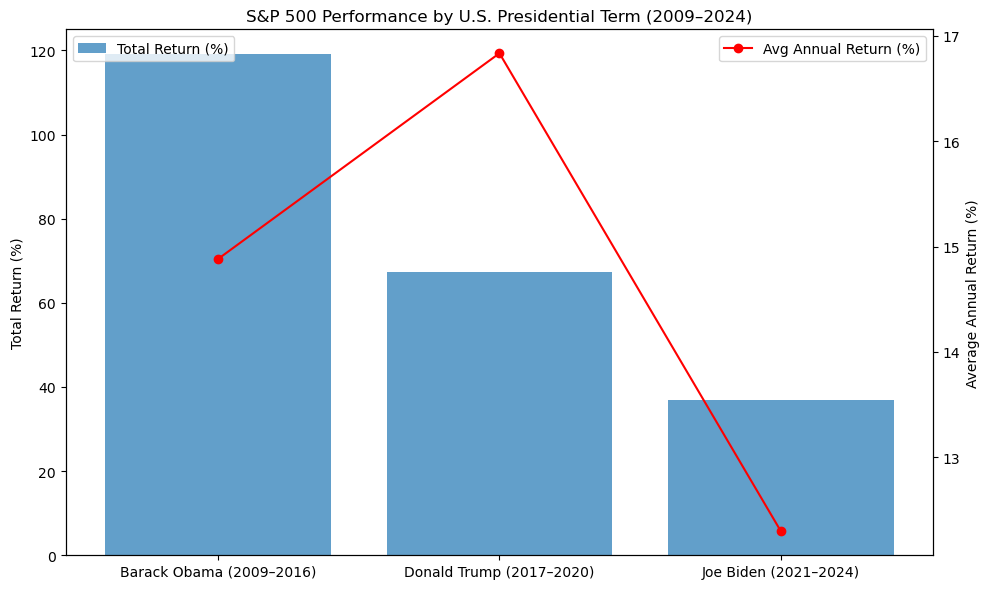

,President,Start Year,End Year,Total Return (%),Average Annual Return (%)
0,Barack Obama (2009–2016),2009,2016,119.05,14.881250
1,Donald Trump (2017–2020),2017,2020,67.34,16.835000
2,Joe Biden (2021–2024),2021,2024,36.89,12.296667


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("history.csv")

# Rename columns for clarity
df.columns = ['Year', 'Annual Return (%)']

# Ensure correct data types
df['Year'] = df['Year'].astype(int)
df['Annual Return (%)'] = pd.to_numeric(df['Annual Return (%)'], errors='coerce')

# Define presidential terms
terms = {
    'Barack Obama (2009–2016)': (2009, 2016),
    'Donald Trump (2017–2020)': (2017, 2020),
    'Joe Biden (2021–2024)': (2021, 2024)
}

# Analyze each term
results = []
for president, (start, end) in terms.items():
    term_data = df[(df['Year'] >= start) & (df['Year'] <= end)]
    total_return = term_data['Annual Return (%)'].sum()
    average_return = term_data['Annual Return (%)'].mean()
    results.append({
        'President': president,
        'Start Year': start,
        'End Year': end,
        'Total Return (%)': total_return,
        'Average Annual Return (%)': average_return
    })

# Create a DataFrame for results
results_df = pd.DataFrame(results)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Bar chart for total return
ax.bar(results_df['President'], results_df['Total Return (%)'], label='Total Return (%)', alpha=0.7)

# Line chart for average annual return (secondary axis)
ax2 = ax.twinx()
ax2.plot(results_df['President'], results_df['Average Annual Return (%)'], color='red', marker='o', label='Avg Annual Return (%)')

# Labels and titles
ax.set_ylabel('Total Return (%)')
ax2.set_ylabel('Average Annual Return (%)')
plt.title('S&P 500 Performance by U.S. Presidential Term (2009–2024)')

# Show legends
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# Also print the DataFrame for reference
results_df
